### Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif

### Loading excel/csv files

In [2]:
application_rec = pd.read_csv('application_record.csv')

                     
                     

### Divide to groups

In [3]:
# Sort the dataset by a specific column
application_rec = application_rec.sort_values(by='CNT_CHILDREN')

# Specify the number of groups to create
n_groups = 3

# Calculate the number of rows per group
n_rows = len(application_rec)
rows_per_group = n_rows // n_groups
remainder = n_rows % n_groups

# Divide the dataset into n groups
start_idx = 0
groups = []
for i in range(n_groups):
    if i < remainder:
        end_idx = start_idx + rows_per_group + 1
    else:
        end_idx = start_idx + rows_per_group
    groups.append(application_rec.iloc[start_idx:end_idx])
    start_idx = end_idx

In [4]:
print(len(groups[0]), len(groups[1]), len(groups[2]))

146184 146184 146184


In [5]:
group_idx = 2
column_name = 'CNT_CHILDREN'
group = groups[group_idx]
n_zeros = len(group[group[column_name] == 0])
n_zeros

11699

In [6]:
group = groups[2]
application_rec = pd.DataFrame(data=group)
application_rec.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
25381,5085770,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19310,-1477,1,0,0,0,Cleaning staff,2
25382,5085771,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19310,-1477,1,0,0,0,Cleaning staff,2
25383,5085775,M,N,Y,0,315000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-17995,-4034,1,0,0,0,Managers,2


### Check correlation between two columns

In [7]:
# Create two arrays of data
x = application_rec['CNT_CHILDREN']
y = application_rec['CNT_FAM_MEMBERS']

# Calculate the Pearson correlation coefficient
corr, pval = stats.pearsonr(x, y)

# Print the result
print(f"Pearson correlation coefficient: {corr}")

Pearson correlation coefficient: 0.9044608104999518


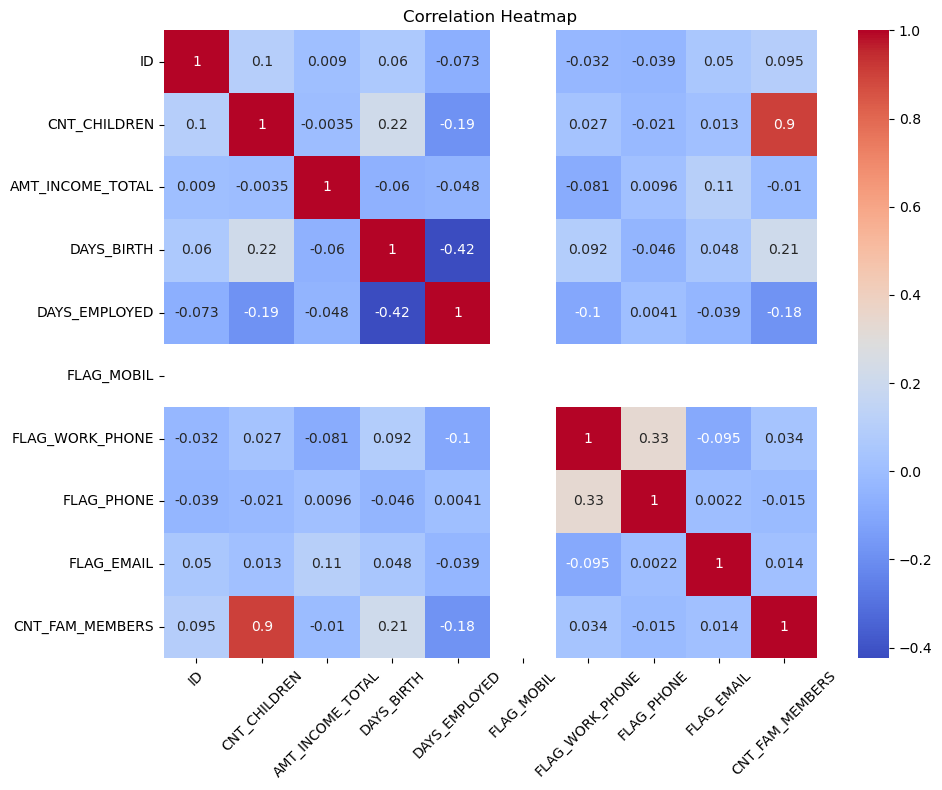

In [8]:
# Create a correlation matrix
corr_matrix = application_rec.corr()

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
application_rec.loc[(application_rec['CNT_CHILDREN']== 0)  , 'y'] = '0'
application_rec.loc[(application_rec['CNT_CHILDREN']== 1) , 'y'] = '1'
application_rec.loc[(application_rec['CNT_CHILDREN'] >= 2) , 'y'] = '2up'
                     


In [10]:
bundle_counts = application_rec.groupby('CNT_CHILDREN').size().reset_index(name='Bundle_Count')

print(bundle_counts)                    

    CNT_CHILDREN  Bundle_Count
0              0         11699
1              1         88526
2              2         39884
3              3          5430
4              4           486
5              5           133
6              6             4
7              7             9
8              9             5
9             12             4
10            14             3
11            19             1


In [11]:
bundle_counts = application_rec.groupby('y').size().reset_index(name='Bundle_Count')

print(bundle_counts)                    

     y  Bundle_Count
0    0         11699
1    1         88526
2  2up         45959


### Head

In [12]:
y

25381      2
25382      2
25383      2
78860      2
78859      2
          ..
208905    14
20437     15
20438     15
20436     15
36383     20
Name: CNT_FAM_MEMBERS, Length: 146184, dtype: int64

In [13]:
application_rec.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,y
25381,5085770,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19310,-1477,1,0,0,0,Cleaning staff,2,0
25382,5085771,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19310,-1477,1,0,0,0,Cleaning staff,2,0
25383,5085775,M,N,Y,0,315000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-17995,-4034,1,0,0,0,Managers,2,0
78860,5618212,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-18953,-231,1,0,0,0,Cleaning staff,2,0
78859,5618211,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-18953,-231,1,0,0,0,Cleaning staff,2,0


### Changing M to 1 and women to 0, also changing Y to 1 and N to 0

In [14]:
application_rec['CODE_GENDER'] = application_rec['CODE_GENDER'].replace({'M': 1, 'F': 0})
application_rec['FLAG_OWN_CAR'] = application_rec['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
application_rec['FLAG_OWN_REALTY'] = application_rec['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})

### division with 365

In [15]:
application_rec['AGE']=-(application_rec['DAYS_BIRTH'])//365
application_rec['employment_status'] = application_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x < 0 else 0)

In [16]:
application_rec['employment_status']

25381     1
25382     1
25383     1
78860     1
78859     1
         ..
208905    1
20437     1
20438     1
20436     1
36383     1
Name: employment_status, Length: 146184, dtype: int64

In [17]:
application_rec['AGE']

25381     52
25382     52
25383     49
78860     51
78859     51
          ..
208905    38
20437     48
20438     48
20436     48
36383     30
Name: AGE, Length: 146184, dtype: int64

### Remove children count

In [18]:
application_rec = application_rec.drop(['DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','ID'], axis=1)

In [19]:
application_rec.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status
25381,0,0,1,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,0,52,1
25382,0,0,1,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,0,52,1
25383,1,0,1,0,315000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Managers,0,49,1
78860,1,1,1,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Cleaning staff,0,51,1
78859,1,1,1,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Cleaning staff,0,51,1


### Info on data and removing blanks

In [20]:
application_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146184 entries, 25381 to 36383
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          146184 non-null  int64  
 1   FLAG_OWN_CAR         146184 non-null  int64  
 2   FLAG_OWN_REALTY      146184 non-null  int64  
 3   CNT_CHILDREN         146184 non-null  int64  
 4   AMT_INCOME_TOTAL     146184 non-null  float64
 5   NAME_INCOME_TYPE     146184 non-null  object 
 6   NAME_EDUCATION_TYPE  146184 non-null  object 
 7   NAME_FAMILY_STATUS   146184 non-null  object 
 8   NAME_HOUSING_TYPE    146184 non-null  object 
 9   FLAG_MOBIL           146184 non-null  int64  
 10  FLAG_WORK_PHONE      146184 non-null  int64  
 11  FLAG_PHONE           146184 non-null  int64  
 12  FLAG_EMAIL           146184 non-null  int64  
 13  OCCUPATION_TYPE      118973 non-null  object 
 14  y                    146184 non-null  object 
 15  AGE           

### Dropped all N/A values 

In [21]:
application_rec = application_rec.dropna()

In [22]:
application_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118973 entries, 25381 to 36383
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          118973 non-null  int64  
 1   FLAG_OWN_CAR         118973 non-null  int64  
 2   FLAG_OWN_REALTY      118973 non-null  int64  
 3   CNT_CHILDREN         118973 non-null  int64  
 4   AMT_INCOME_TOTAL     118973 non-null  float64
 5   NAME_INCOME_TYPE     118973 non-null  object 
 6   NAME_EDUCATION_TYPE  118973 non-null  object 
 7   NAME_FAMILY_STATUS   118973 non-null  object 
 8   NAME_HOUSING_TYPE    118973 non-null  object 
 9   FLAG_MOBIL           118973 non-null  int64  
 10  FLAG_WORK_PHONE      118973 non-null  int64  
 11  FLAG_PHONE           118973 non-null  int64  
 12  FLAG_EMAIL           118973 non-null  int64  
 13  OCCUPATION_TYPE      118973 non-null  object 
 14  y                    118973 non-null  object 
 15  AGE           

In [23]:
application_rec.sample(20)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status
78377,0,0,0,0,202500.0,Working,Higher education,Separated,House / apartment,1,0,1,0,Accountants,0,42,1
19743,0,1,1,0,360000.0,Working,Secondary / secondary special,Separated,House / apartment,1,1,0,0,Medicine staff,0,29,1
41478,0,1,1,0,117000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,0,51,1
194098,1,1,0,2,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Realty agents,2up,30,1
160419,0,0,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Sales staff,2up,36,1
438084,0,0,1,1,202500.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Managers,1,41,1
43064,1,0,0,1,360000.0,Working,Lower secondary,Married,House / apartment,1,0,0,1,Laborers,1,34,1
265231,1,0,1,1,337500.0,Working,Secondary / secondary special,Separated,Municipal apartment,1,0,0,0,High skill tech staff,1,44,1
137194,1,1,1,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,1,48,1
98177,1,0,1,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,1,Drivers,1,35,1


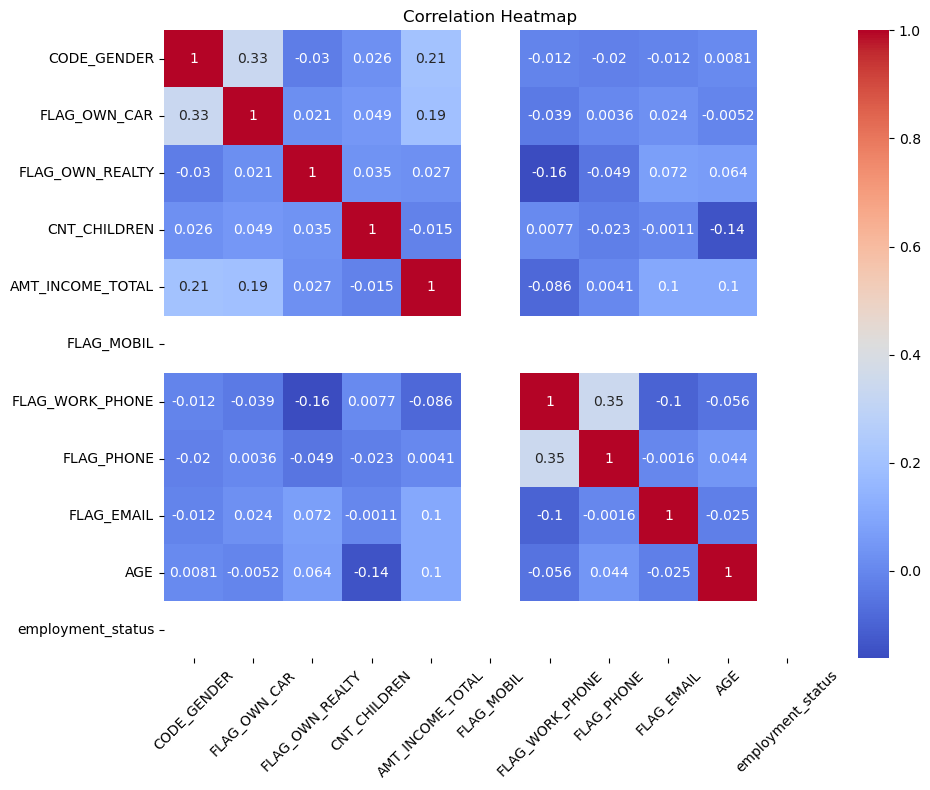

In [24]:
# Create a correlation matrix
corr_matrix = application_rec.corr()

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
application_rec.reset_index(inplace=True)
application_rec.to_csv("Data_For_clastering strtified 3  groups.csv")

### kfold =5

In [26]:
kf = StratifiedKFold(n_splits=10)

### Crearting lists to hold scores of each model

In [27]:

y=application_rec['y']
x=application_rec.drop('y', axis=1)

In [28]:
x=x.drop('index', axis=1)

In [29]:
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,AGE,employment_status
0,0,0,1,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,52,1
1,0,0,1,0,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,52,1
2,1,0,1,0,315000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Managers,49,1
3,1,1,1,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Cleaning staff,51,1
4,1,1,1,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Cleaning staff,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118968,0,0,1,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,38,1
118969,1,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Drivers,48,1
118970,1,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Drivers,48,1
118971,1,1,1,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Drivers,48,1


In [30]:
y=pd.DataFrame(y)
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
118968,2up
118969,2up
118970,2up
118971,2up


In [31]:
def create_empty_c_matrix_dictionary(empty_dict,labels):

    for i,label in enumerate(labels):
        empty_dict[label]={}
        empty_dict[label]['TN']=[]
        empty_dict[label]['FP']=[]
        empty_dict[label]['FN']=[]
        empty_dict[label]['TP']=[]

def append_to_c_matrix(dict_model,y_true,y_pred,labels):
    ans=multilabel_confusion_matrix(y_true, y_pred,
                             labels=labels)
    for i,label in enumerate(labels):
            dict_model[label]['TN'].append(ans[i][0][0])
            dict_model[label]['FP'].append(ans[i][0][1])
            dict_model[label]['FN'].append(ans[i][1][0])
            dict_model[label]['TP'].append(ans[i][1][1])

### Creating constructors for the different models

In [32]:
rf_model = RandomForestClassifier(random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=3)
lr_model= LogisticRegression()
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [33]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list=[]

labels=['0','1','2up']

knn_c_matrix={}
rf_c_matrix={}
lr_c_matrix={}
gb_c_matrix={}
create_empty_c_matrix_dictionary(knn_c_matrix,labels)
create_empty_c_matrix_dictionary(rf_c_matrix,labels)
create_empty_c_matrix_dictionary(lr_c_matrix,labels)
create_empty_c_matrix_dictionary(gb_c_matrix,labels)


for train_index,test_index in kf.split(x,y):
    print("Entering loop..")
    expected_classes = np.arange(25)
    X_train,X_test,y_train, y_test = x.loc[train_index],x.loc[test_index], y.loc[train_index], y.loc[test_index]
    cols_to_encode = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder.fit(X_train[cols_to_encode])
    X_train_encoded = encoder.transform(X_train[cols_to_encode])
    X_test_encoded = encoder.transform(X_test[cols_to_encode])
    cols_to_encode_std = ['AMT_INCOME_TOTAL', 'AGE']
    
    scaler = StandardScaler()
    scaler.fit(X_train[cols_to_encode_std])
    X_train=scaler.transform(X_train[cols_to_encode_std])
    X_test=scaler.transform(X_test[cols_to_encode_std])
        
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    knn_model.fit(X_train, y_train)
    knn_y_pred=knn_model.predict(X_test)
    append_to_c_matrix(knn_c_matrix,y_test,knn_y_pred,labels)


    rf_model.fit(X_train, y_train)
    rf_y_pred=rf_model.predict(X_test)
    append_to_c_matrix(rf_c_matrix,y_test,rf_y_pred,labels)


    lr_model.fit(X_train, y_train)
    lr_y_pred=lr_model.predict(X_test)
    append_to_c_matrix(lr_c_matrix,y_test,lr_y_pred,labels)

    
    gb_model.fit(X_train, y_train)
    gb_y_pred=gb_model.predict(X_test)
    gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
    append_to_c_matrix(gb_c_matrix,y_test,gb_y_pred,labels)


Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2526927275.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

#### Creating a summary table for the 4 models for their confusion matrix results

In [34]:
labels=['0','1','2up']
def calculate_performance(tp, tn, fp, fn):
    # Calculate total samples
    total_samples = tp + tn + fp + fn

    # Calculate accuracy
    accuracy = (tp + tn) / total_samples

    # Calculate precision, recall, and F1 score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    tpr = recall
    fpr = fp / (fp + tn)
    # Calculate Area Under the ROC Curve (AUC)
    roc_curve = np.array([(0, 0), (fpr, recall), (1, 1)])
    sorted_indices = np.argsort(roc_curve[:, 0])
    sorted_curve = roc_curve[sorted_indices]
    auc = np.trapz(sorted_curve[:, 1], sorted_curve[:, 0])
    performance = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "auc":auc

    }

    return performance


# performance = calculate_performance(tp, tn, fp, fn)
# print(performance)



def get_summery_per_model_and_lable(model_c_matrix,label):
    mean_TP=np.mean(model_c_matrix[label]['TP'])
    mean_TN=np.mean(model_c_matrix[label]['TN'])
    mean_FP=np.mean(model_c_matrix[label]['FP'])
    mean_FN=np.mean(model_c_matrix[label]['FN'])
    pref=calculate_performance(mean_TP, mean_TN, mean_FP, mean_FN)
    
    return [mean_TP,np.std(model_c_matrix[label]['TP']),
             mean_FP,np.std(model_c_matrix[label]['FP']),
             mean_TN,np.std(model_c_matrix[label]['TN']),
             mean_FN,np.std(model_c_matrix[label]['FN']),pref["accuracy"],pref["precision"],pref["recall"],pref["f1_score"],pref["auc"]]

summeries={}
for label in labels:
    summeries[label] = pd.DataFrame(columns= ['Mean TP'] +['sd TP']+ ['Mean FP'] + ['sd FP'] + ['Mean TN'] + ['sd TN']+ ['Mean FN']+ ['sd FN'] +["Accuracy"]+["Precision"]+["Recall"]+["F1_score"]+["AUC"])

    summary_knn=get_summery_per_model_and_lable(knn_c_matrix,label) 
    summary_rf=get_summery_per_model_and_lable(rf_c_matrix,label)
    summary_lr=get_summery_per_model_and_lable(lr_c_matrix,label)
    summary_gb=get_summery_per_model_and_lable(gb_c_matrix,label)
    
    summeries[label].loc["KNN"] = summary_knn
    summeries[label].loc["Random forest"] = summary_rf
    summeries[label].loc["Logistic regression"] = summary_lr
    summeries[label].loc["Gradient Boosting"] = summary_gb
    

    #print(label,'\n',summary_for_label)
# summeries['1-3']
# summeries['0']
# Summary_knn = [st.mean(knn_TP) ,st.stdev(knn_TP),st.mean(knn_FP) ,st.stdev(knn_FP),st.mean(knn_TN),st.stdev(knn_TN),st.mean(knn_FN),st.stdev(knn_FN)] 


C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2707103306.py:10: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)
C:\Users\shula\AppData\Local\Temp\ipykernel_8856\2707103306.py:10: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


In [35]:
summeries['0']

,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,486.4,24.569086,6412.7,175.646833,4737.0,175.667868,261.2,24.685218,0.439041,0.070502,0.650615,0.127218,0.537735
Random forest,99.1,22.295515,141.5,41.757035,11008.2,41.765536,648.5,22.114475,0.933598,0.411887,0.132558,0.200567,0.559933
Logistic regression,15.3,9.940322,1.3,2.002498,11148.4,1.854724,732.3,9.970456,0.938339,0.921687,0.020465,0.040042,0.510174
Gradient Boosting,0.0,0.000000,0.0,0.000000,11149.7,0.458258,747.6,0.489898,0.937162,NaN,0.000000,NaN,0.500000


In [36]:
summeries['1']

,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,2967.5,112.087689,1766.6,68.464882,2817.8,68.566464,4345.4,111.952847,0.486270,0.626835,0.405790,0.492654,0.510220
Random forest,6221.2,92.424888,3589.3,87.845376,995.1,87.709122,1091.7,92.412175,0.606549,0.634137,0.850716,0.726631,0.533889
Logistic regression,7312.3,1.004988,4568.4,10.910545,16.0,10.853571,0.6,1.019804,0.615963,0.615477,0.999918,0.761952,0.501704
Gradient Boosting,7293.3,45.536908,4563.8,46.108134,20.6,46.050407,19.6,45.578943,0.614753,0.615100,0.997320,0.760908,0.500907


In [37]:
summeries['2up']

,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,111.3,24.552189,152.8,31.634791,7907.7,31.746023,3725.5,24.780032,0.674018,0.421431,0.029009,0.054281,0.505026
Random forest,786.9,72.193421,1059.3,86.556398,7001.2,86.362955,3049.9,72.308298,0.654611,0.426227,0.205093,0.276931,0.536837
Logistic regression,0.0,0.000000,0.0,0.000000,8060.5,0.500000,3836.8,0.400000,0.677507,NaN,0.000000,NaN,0.500000
Gradient Boosting,7.5,15.370426,32.7,80.642483,8027.8,80.774749,3829.3,15.277762,0.675389,0.186567,0.001955,0.003869,0.498949


##### LOGISTIC REGRESSION FEATURE IMPORTANCE

Feature:CODE_GENDER,  Feature_num:0, Score: -0.03800
Feature:FLAG_OWN_CAR,  Feature_num:1, Score: 0.54507


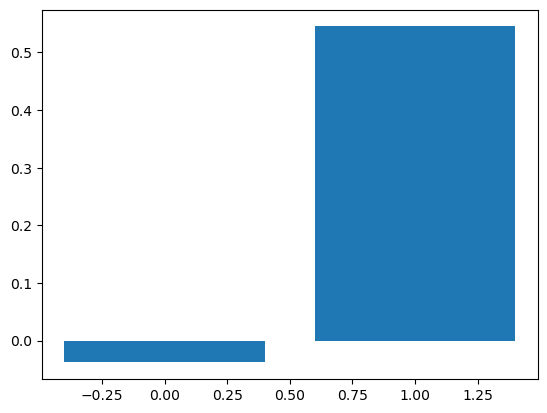

In [38]:
from matplotlib import pyplot

importance = lr_model.coef_[0]

# summarize feature importance
 
for i,v in enumerate(importance):
    print(f'Feature:{x.columns[i]},  Feature_num:%0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### GRADIENT BOOSTING FEATURE IMPORTANCE

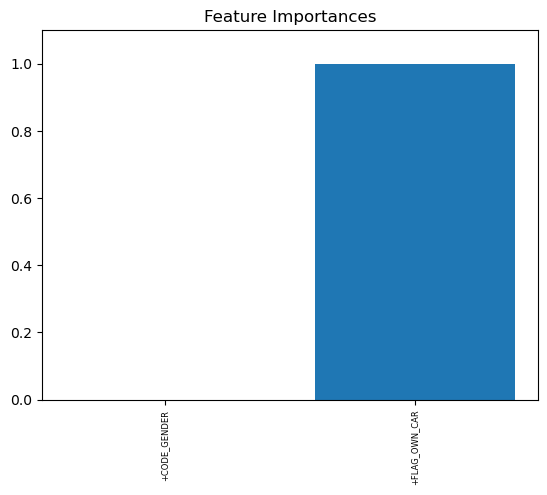

In [39]:
application_rec = application_rec.set_index(application_rec.columns[0])

# Compute feature importances
importances = gb_model.feature_importances_

# Create a list of feature names with negative or positive prefixes
prefixes = ['+' if i >= 0 else '-' for i in importances]
features = [f"{prefixes[i]}{application_rec.columns[i]}" for i in range(len(importances))]

# Plot feature importances
num_features = len(importances)
plt.bar(range(num_features), importances)
plt.xticks(range(num_features), features, rotation=90, fontsize=6)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.title("Feature Importances")
plt.ylim([0, max(importances) * 1.1])
plt.show()

##### RANDOM FOREST FEATURE IMPORTANCE

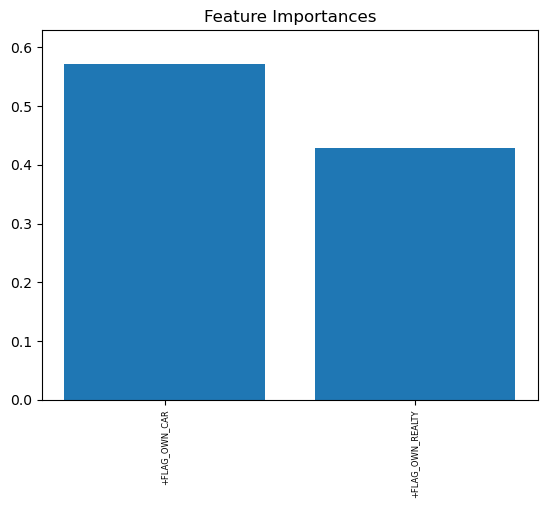

In [40]:
application_rec = application_rec.set_index(application_rec.columns[0])

import numpy as np
import matplotlib.pyplot as plt

# Compute feature importances
importances = rf_model.feature_importances_

# Create a list of feature names with negative or positive prefixes
prefixes = ['+' if i >= 0 else '-' for i in importances]
features = [f"{prefixes[i]}{application_rec.columns[i]}" for i in range(len(importances))]

# Plot feature importances
num_features = len(importances)
plt.bar(range(num_features), importances)
plt.xticks(range(num_features), features, rotation=90, fontsize=6)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.title("Feature Importances")
plt.ylim([0, max(importances) * 1.1])
plt.show()

In [41]:
# Compute feature importances
#importances = rf_model.feature_importances_

# Create a list of feature names with negative or positive prefixes
#prefixes = ['+' if i >= 0 else '-' for i in importances]
#features = [f"{prefixes[i]}{application_rec.columns[i]}" for i in range(len(importances))]

# Print importance scores for each feature
#for i, imp in enumerate(importances):
#    print(f"{features[i]}: {imp}")

In [42]:
#filtered_df.to_csv("Moderate_days0_after_encoding.csv")
#Summary.to_csv("Moderate_days0_summary_encoding.csv")